In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, Normalizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix


from kaggle.api.kaggle_api_extended import KaggleApi

print(tf.__version__)

In [6]:
test_raw=pd.read_csv("/Users/aliocha/data-kaggle/test.csv")
dataset=pd.read_csv("/Users/aliocha/data-kaggle/train.csv")

In [8]:
dataset.tail()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
299995,299995,0,0,0,T,N,Red,Trapezoid,Snake,India,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,...,ab0ce192b,1,Master,Boiling Hot,h,W,uJ,3,8,1
299999,299999,0,0,0,F,Y,Blue,Trapezoid,Dog,Russia,...,ad1af2b45,3,Contributor,Freezing,i,R,tP,1,3,0


In [51]:
dataset.ord_1.unique()

array(['Grandmaster', 'Expert', 'Novice', 'Contributor', 'Master'],
      dtype=object)

In [57]:
nom_vars=['nom_%s'%i for i in range(10)]
for x in nom_vars:
    print(x,":",train_dataset[x].unique().shape[0])

nom_0 : 3
nom_1 : 6
nom_2 : 6
nom_3 : 6
nom_4 : 4
nom_5 : 222
nom_6 : 522
nom_7 : 1220
nom_8 : 2214
nom_9 : 11917


In [65]:
for x in ['ord_%s'%i for i in range(6)]:
    print(x,":",train_dataset[x].unique().shape[0])

ord_0 : 3
ord_1 : 5
ord_2 : 6
ord_3 : 15
ord_4 : 26
ord_5 : 192


In [11]:
target=dataset.target.values
features=dataset[['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4',
                 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4',
                 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'day', 'month']].copy()

features['bin_3']=features['bin_3'].map({'Y':1, 'N':0, 'T':1, 'F':0})
features['bin_4']=features['bin_4'].map({'Y':1, 'N':0, 'T':1, 'F':0})

mapping = {"ord_1": {'Grandmaster':4, 'Expert':2, 'Novice':0, 'Contributor':1, 'Master':3},
           "ord_2": {'Cold':1, 'Hot':3, 'Lava Hot':5, 'Boiling Hot':4, 'Freezing':0, 'Warm':2}}
features.replace(mapping, inplace=True)

lb_make = LabelEncoder()
features["ord_3"] = lb_make.fit_transform(features["ord_3"])
features["ord_4"] = lb_make.fit_transform(features["ord_4"])

features=pd.get_dummies(features, columns=["nom_0", "nom_1","nom_2", "nom_3", "nom_4"], prefix="")



features.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold,h,D,2,2
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot,a,A,7,8
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot,h,R,7,2
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot,i,D,2,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing,a,R,7,8


In [117]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

In [27]:
confusion_matrix(y_test, predictions)

array([[37715,  3792],
       [12513,  5980]])

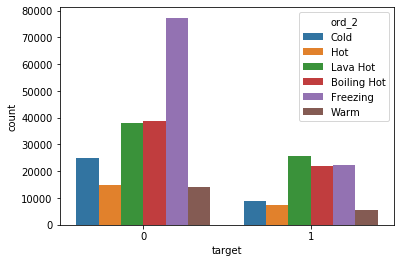

In [47]:
sns.countplot(x='target', hue='ord_2', data=dataset)

In [48]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82     41507
           1       0.61      0.32      0.42     18493

    accuracy                           0.73     60000
   macro avg       0.68      0.62      0.62     60000
weighted avg       0.71      0.73      0.70     60000



In [ ]:
df=test_raw[['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4',
                 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4',
                 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'day', 'month']].copy()

df['bin_3']=df['bin_3'].map({'Y':1, 'N':0, 'T':1, 'F':0})
df['bin_4']=df['bin_4'].map({'Y':1, 'N':0, 'T':1, 'F':0})

mapping = {"ord_1": {'Grandmaster':4, 'Expert':2, 'Novice':0, 'Contributor':1, 'Master':3},
           "ord_2": {'Cold':1, 'Hot':3, 'Lava Hot':5, 'Boiling Hot':4, 'Freezing':0, 'Warm':2}}
df.replace(mapping, inplace=True)

lb_make = LabelEncoder()
df["ord_3"] = lb_make.fit_transform(df["ord_3"])
df["ord_4"] = lb_make.fit_transform(df["ord_4"])

df=pd.get_dummies(df, columns=["nom_0", "nom_1","nom_2", "nom_3", "nom_4"], prefix="")



df.head()



In [ ]:
yf=clf.predict(df)
ds=test_raw.copy()
ds["target"]=yf
output=ds[["id","target"]]
output.head()

In [ ]:
output.to_csv("submission.csv", index=False)